#  LOAN PREDICITION


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import numpy as np

# Reading in the input data form loan predicition

In [2]:
a=pd.read_csv("/Users/user/Desktop/data/training_set.csv")

In [3]:
a.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
a.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583.0,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
a.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### view the important statistics like mean, standard deviation, minimum and maximum values of the numeric attributes

In [6]:
a.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### when we look inside the describe step we found missing values

In [7]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


## Handling missing values

In [8]:
from scipy.stats import mode

### for categorical values

In [9]:
a['Gender'].fillna(mode(list(a['Gender'])).mode[0], inplace=True)
a['Married'].fillna(mode(list(a['Married'])).mode[0],inplace=True)
a['Education'].fillna(mode(list(a['Education'])).mode[0],inplace=True)
a['Self_Employed'].fillna(mode(list(a['Self_Employed'])).mode[0],inplace=True)

### for numerical values

In [10]:
a['LoanAmount'].fillna(a['LoanAmount'].mean(), inplace=True)
a['Loan_Amount_Term'].fillna(method='ffill',inplace=True)
a['Credit_History'].fillna(method='ffill',inplace=True)
a['ApplicantIncome'].fillna(method='ffill',inplace=True)
a['CoapplicantIncome'].fillna(method='ffill',inplace=True)

In [11]:
a['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
mapping={'0':0,'1':1,'2':2,'3+':3}
a= a.replace({'Dependents':mapping})
a['Dependents'].fillna(a['Dependents'].mean(), inplace=True)

In [13]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(6), object(7)
memory usage: 62.5+ KB


In [14]:
cat=[]
con=[]
for i in a.columns:
    if(a[i].dtypes=="object"):
            cat.append(i)
    else:
                con.append(i)

In [15]:
a['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
a.select_dtypes(include=['object']).head()

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Y
1,LP001003,Male,Yes,Graduate,No,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,Urban,Y
4,LP001008,Male,No,Graduate,No,Urban,Y


In [17]:
a.select_dtypes(include=['float']).head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849.0,0.0,146.412162,360.0,1.0
1,1.0,5849.0,1508.0,128.000000,360.0,1.0
2,0.0,3000.0,0.0,66.000000,360.0,1.0
3,0.0,2583.0,2358.0,120.000000,360.0,1.0
4,0.0,6000.0,0.0,141.000000,360.0,1.0


# Exploraty data analysis

In [18]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

In [19]:
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

Text(0.5, 1.0, 'Gender')

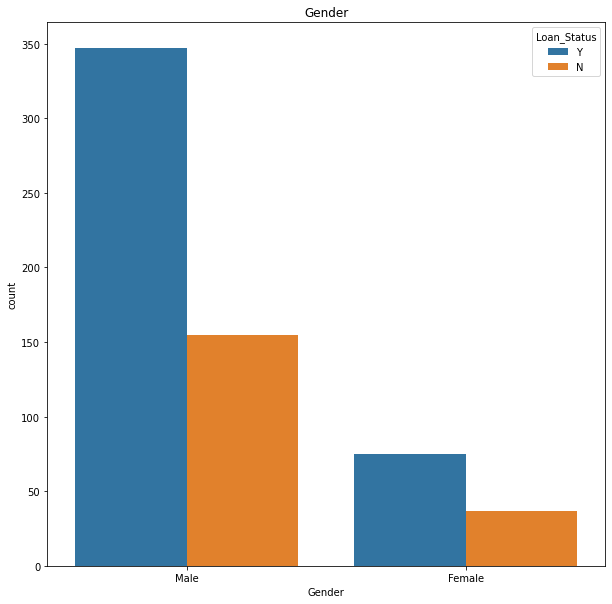

In [20]:
sb.countplot(a['Gender'],hue=a["Loan_Status"])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Gender')

Text(0.5, 1.0, 'Married')

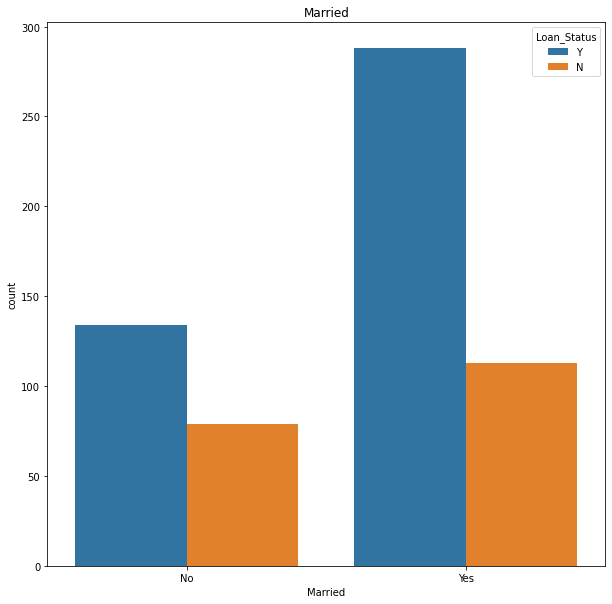

In [21]:
sb.countplot(a['Married'],hue=a["Loan_Status"])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Married')

Text(0.5, 1.0, 'Self_Employed')

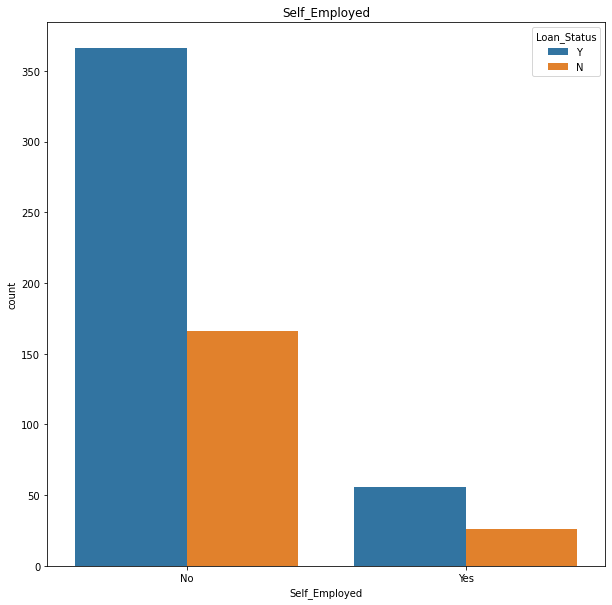

In [22]:
sb.countplot(a['Self_Employed'],hue=a["Loan_Status"])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Self_Employed')

Text(0.5, 1.0, 'Education')

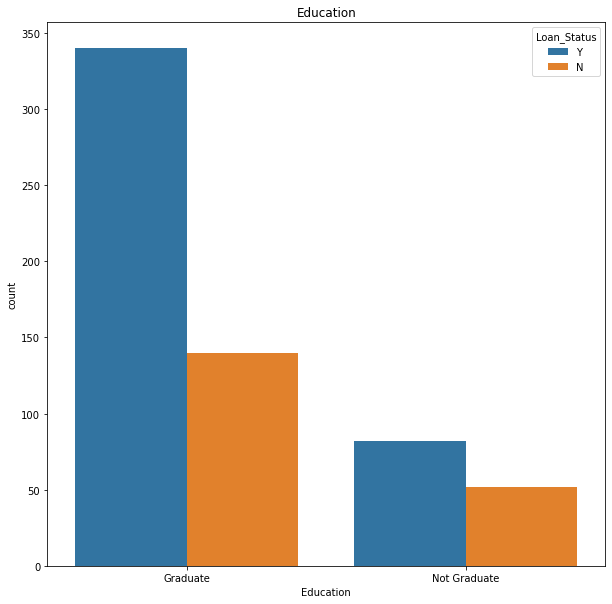

In [23]:
sb.countplot(a['Education'],hue=a["Loan_Status"])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Education')

Text(0.5, 1.0, 'Property_Area')

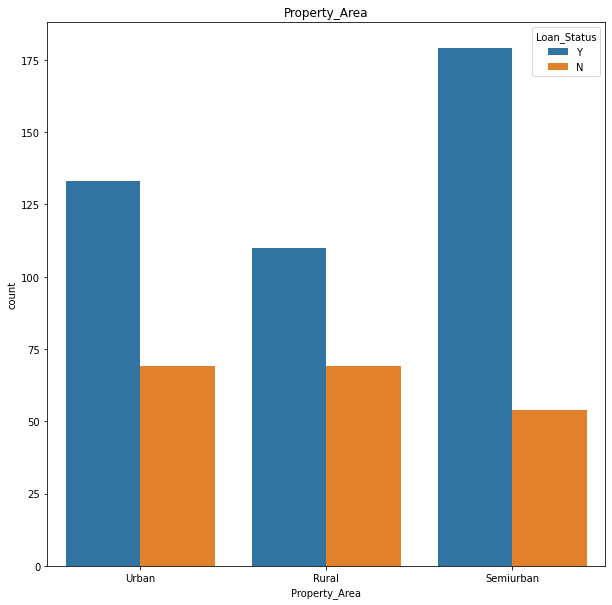

In [24]:
sb.countplot(a['Property_Area'],hue=a["Loan_Status"])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Property_Area')

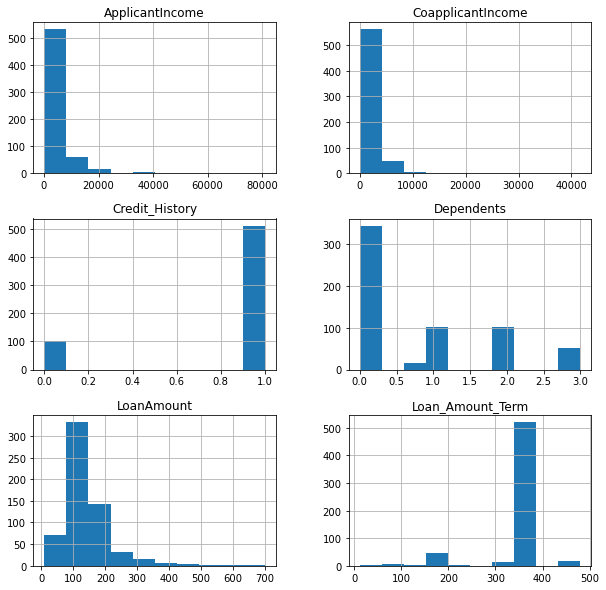

In [25]:
a[con].hist(figsize=(10,10))
plt.show()

In [26]:
# creating a dataframe that shows values based on grouping by age
Credit_History=pd.DataFrame(a.groupby("Credit_History")[['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].mean())
Credit_History.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Credit_History,,,,,
0.0,0.889254,5681.108911,1559.366337,149.976719,346.336634
1.0,0.738069,5344.146199,1631.206472,145.710368,340.701754


In [27]:
Credit_History["Count"]=a.Credit_History.value_counts(dropna=False) # adding new column 
Credit_History.reset_index(level=0, inplace=True)
Credit_History.head()

,Credit_History,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Count
0,0.0,0.889254,5681.108911,1559.366337,149.976719,346.336634,101
1,1.0,0.738069,5344.146199,1631.206472,145.710368,340.701754,513


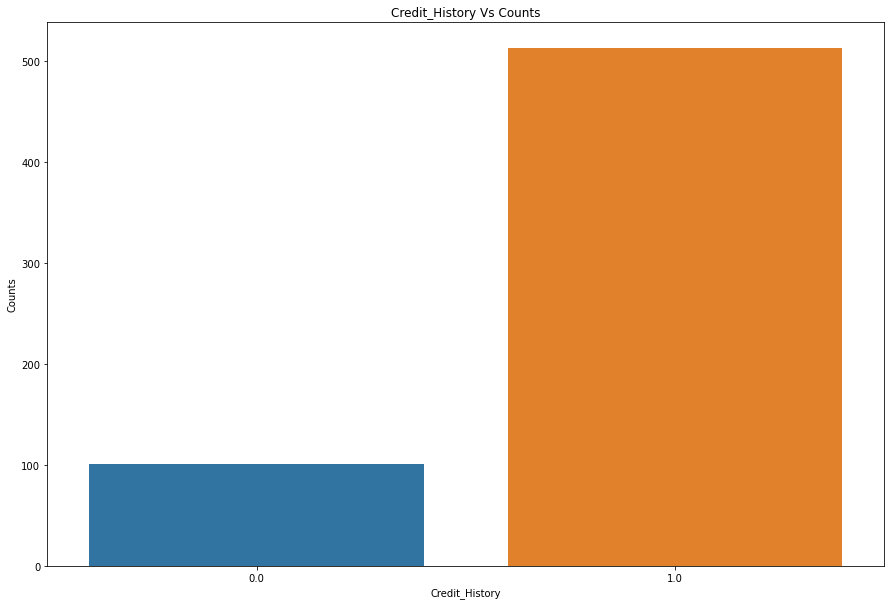

In [28]:
plt.figure(figsize=(15,10))
ax=sb.barplot(x=Credit_History.Credit_History,y=Credit_History.Count)
plt.xlabel("Credit_History")
plt.ylabel("Counts")
plt.title("Credit_History Vs Counts")
plt.show()

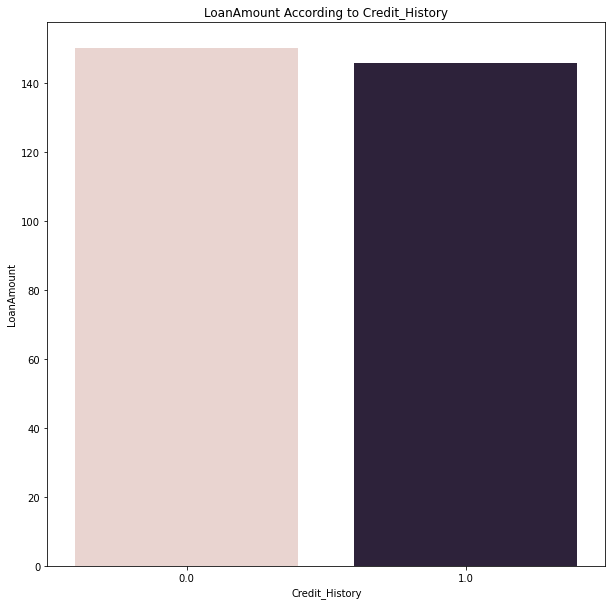

In [29]:
plt.figure(figsize=(10,10))
ax=sb.barplot(x=Credit_History.Credit_History,y=Credit_History.LoanAmount,palette = sb.cubehelix_palette(len(Credit_History.index)))
plt.xlabel("Credit_History")
plt.ylabel("LoanAmount")
plt.title("LoanAmount According to Credit_History")
plt.show()

In [30]:
#converting the cateogorical data to numbers using the label encoder
x1 = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in x1:
    le.fit(list(a[i].values))
    a[i] = le.transform(list(a[i]))

In [31]:
a.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1.0,0,0,5849.0,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0.0,0,1,3000.0,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0.0,1,0,2583.0,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0.0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1


In [32]:
a.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.173258,0.045364,-0.000525,0.058488,0.082606,0.107930,-0.078273,-0.004817,-0.025752,0.017987
Married,0.364569,1.000000,0.339653,0.012304,0.004489,0.053272,0.075479,0.147141,-0.104580,0.008884,0.004257,0.091478
Dependents,0.173258,0.339653,1.000000,0.058317,0.057177,0.119138,0.026385,0.160767,-0.097558,-0.055942,0.006750,0.006685
Education,0.045364,0.012304,0.058317,1.000000,-0.010383,-0.140374,-0.061950,-0.166998,-0.080674,-0.084637,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.057177,-0.010383,1.000000,0.127384,-0.015850,0.115260,-0.041567,-0.019519,-0.030860,-0.003700
ApplicantIncome,0.058488,0.053272,0.119138,-0.140374,0.127384,1.000000,-0.115726,0.565595,-0.043012,-0.020458,-0.011133,-0.005865
CoapplicantIncome,0.082606,0.075479,0.026385,-0.061950,-0.015850,-0.115726,1.000000,0.188097,-0.067509,0.009108,0.009744,-0.059611
LoanAmount,0.107930,0.147141,0.160767,-0.166998,0.115260,0.565595,0.188097,1.000000,0.039488,-0.018836,-0.044776,-0.036416
Loan_Amount_Term,-0.078273,-0.104580,-0.097558,-0.080674,-0.041567,-0.043012,-0.067509,0.039488,1.000000,-0.031843,-0.066556,-0.033378
Credit_History,-0.004817,0.008884,-0.055942,-0.084637,-0.019519,-0.020458,0.009108,-0.018836,-0.031843,1.000000,0.021124,0.525152


In [33]:
a.corr().iplot(kind='box')

In [34]:
a.corr().iplot(kind='heatmap')

In [35]:
x1=a[['Gender','Married','Education','Self_Employed','Property_Area','LoanAmount','Loan_Amount_Term','Credit_History','Dependents']]

In [36]:
x1.head()

,Gender,Married,Education,Self_Employed,Property_Area,LoanAmount,Loan_Amount_Term,Credit_History,Dependents
0,1,0,0,0,2,146.412162,360.0,1.0,0.0
1,1,1,0,0,0,128.000000,360.0,1.0,1.0
2,1,1,0,1,2,66.000000,360.0,1.0,0.0
3,1,1,1,0,2,120.000000,360.0,1.0,0.0
4,1,0,0,0,2,141.000000,360.0,1.0,0.0


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
c=pd.DataFrame(sc.fit_transform(x1),columns=['Gender','Married','Education','Self_Empolyed','Property_Area','LoanAmount','Loan_Amount_Term','Credit_History','Dependents'])

In [38]:
c

,Gender,Married,Education,Self_Empolyed,Property_Area,LoanAmount,Loan_Amount_Term,Credit_History,Dependents
0,0.472343,-1.372089,-0.528362,-0.392601,1.223298,0.000000,0.280037,0.443713,-0.761490
1,0.472343,0.728816,-0.528362,-0.392601,-1.318513,-0.219273,0.280037,0.443713,0.236612
2,0.472343,0.728816,-0.528362,2.547117,1.223298,-0.957641,0.280037,0.443713,-0.761490
3,0.472343,0.728816,1.892641,-0.392601,1.223298,-0.314547,0.280037,0.443713,-0.761490
4,0.472343,-1.372089,-0.528362,-0.392601,1.223298,-0.064454,0.280037,0.443713,-0.761490
...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.528362,-0.392601,-1.318513,-0.898095,0.280037,0.443713,-0.761490
610,0.472343,0.728816,-0.528362,-0.392601,-1.318513,-1.267279,-2.463727,0.443713,2.232816
611,0.472343,0.728816,-0.528362,-0.392601,1.223298,1.269371,0.280037,0.443713,0.236612
612,0.472343,0.728816,-0.528362,-0.392601,1.223298,0.483367,0.280037,0.443713,1.234714


In [39]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
model=km.fit(c)

In [40]:
c['cluster_no']=model.labels_

In [41]:
c

,Gender,Married,Education,Self_Empolyed,Property_Area,LoanAmount,Loan_Amount_Term,Credit_History,Dependents,cluster_no
0,0.472343,-1.372089,-0.528362,-0.392601,1.223298,0.000000,0.280037,0.443713,-0.761490,0
1,0.472343,0.728816,-0.528362,-0.392601,-1.318513,-0.219273,0.280037,0.443713,0.236612,1
2,0.472343,0.728816,-0.528362,2.547117,1.223298,-0.957641,0.280037,0.443713,-0.761490,2
3,0.472343,0.728816,1.892641,-0.392601,1.223298,-0.314547,0.280037,0.443713,-0.761490,1
4,0.472343,-1.372089,-0.528362,-0.392601,1.223298,-0.064454,0.280037,0.443713,-0.761490,0
...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.528362,-0.392601,-1.318513,-0.898095,0.280037,0.443713,-0.761490,0
610,0.472343,0.728816,-0.528362,-0.392601,-1.318513,-1.267279,-2.463727,0.443713,2.232816,1
611,0.472343,0.728816,-0.528362,-0.392601,1.223298,1.269371,0.280037,0.443713,0.236612,1
612,0.472343,0.728816,-0.528362,-0.392601,1.223298,0.483367,0.280037,0.443713,1.234714,1


In [42]:
model.cluster_centers_

array([[-6.61346838e-01, -1.17349633e+00, -3.45257874e-02,
        -3.92600737e-01, -2.23155593e-02, -2.76895087e-01,
         1.58091600e-01,  1.42724245e-02, -5.32811904e-01],
       [ 4.01934639e-01,  7.09774092e-01,  2.75176263e-02,
        -3.92600737e-01,  3.30242601e-02,  9.54147358e-02,
        -6.97724483e-02,  3.64993668e-03,  2.87471175e-01],
       [-1.33720695e-03,  1.14333822e-02, -2.64469637e-02,
         2.54711697e+00, -7.86049106e-02,  2.93580915e-01,
        -1.05874772e-01, -4.97181264e-02,  1.45636997e-01]])

In [43]:
x=x1
y=a['Loan_Status']

#Getting Test and Training Set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)


In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(random_state=10,max_leaf_nodes=3)
model=rfc.fit(xtrain,ytrain)
pred=model.predict(xtest)
from sklearn.metrics import accuracy_score
print("accuracy is %f"%(accuracy_score(ytest,pred)))

from sklearn.metrics import r2_score,confusion_matrix
r2_score(ytest,ypred3)
confusion_matrix(ytest,ypred3)

accuracy is 0.813008


array([[19, 24],
       [10, 70]], dtype=int64)

In [64]:
model.score(xtrain,ytrain)

0.8044806517311609

In [62]:
x=x1
y=a['Loan_Status']

#Getting Test and Training Set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesClassifier
ETree=ExtraTreesClassifier(n_estimators = 100)
model2=ETree.fit(xtrain,ytrain)
ypred3=ETree.predict(xtest)


from sklearn.metrics import accuracy_score
print("accuracy is %f"%(accuracy_score(ytest,pred)))

from sklearn.metrics import r2_score,confusion_matrix
r2_score(ytest,ypred3)
confusion_matrix(ytest,ypred3)

accuracy is 0.813008


array([[19, 24],
       [10, 70]], dtype=int64)

In [65]:
model2.score(xtrain,ytrain)*100

99.18533604887983

In [66]:
ypred3

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)